# Case study on Supervised learning


Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

# 1. Read the dataset to the python environment.

In [2]:
import pandas as pd
data = pd.read_excel("iris.xls")
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


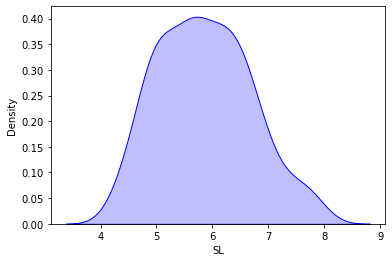

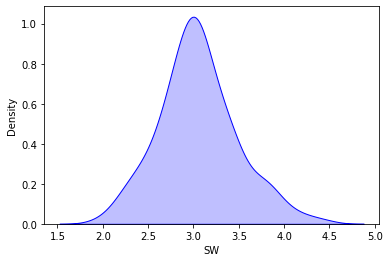

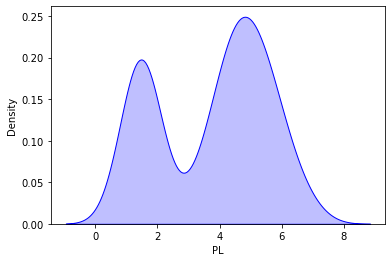

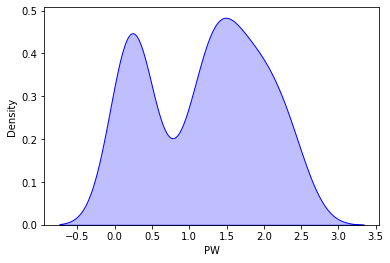

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
freqgraph=data.select_dtypes(include=['float'])
for i in freqgraph:
    sns.kdeplot(data[i], color='blue', shade=True)
    plt.show()

# Do necessary pre-processing steps.

In [8]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [7]:
## Filling Null values with median
data['SL']=data['SL'].fillna(data['SL'].median())
data['SW']=data['SW'].fillna(data['SW'].median())
data['PL']=data['PL'].fillna(data['PL'].median())

In [9]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

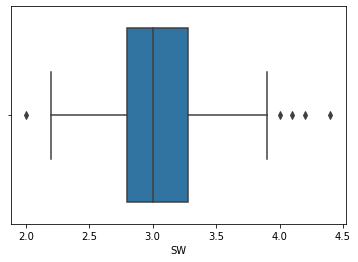

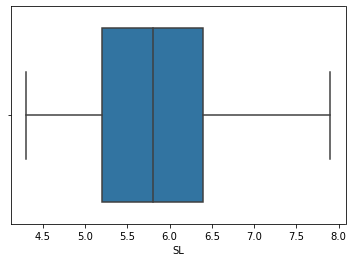

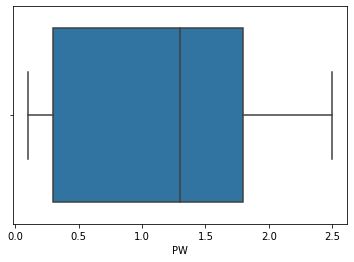

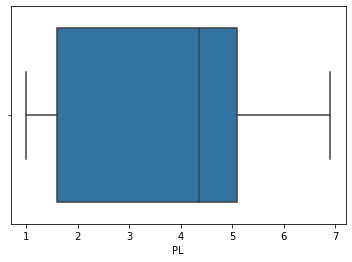

In [10]:
## checking outliers
for i in ['SW','SL', 'PW','PL']:
    #plt.title(i)
    sns.boxplot(x=data[i])
    plt.show() 

Handling outliers in SW.

In [11]:
import numpy as np
q1 = np.percentile(data['SW'],25,interpolation='midpoint')
q3 = np.percentile(data['SW'],75,interpolation='midpoint')

In [12]:
IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

In [13]:
index=data['SW'][(data['SW']<low_limit)|(data['SW']>high_limit)].index
data.drop(index,inplace=True)

<AxesSubplot:xlabel='SW'>

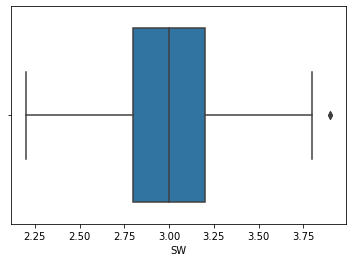

In [14]:
sns.boxplot(x=data['SW'])

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [15]:
x=data.drop('Classification',axis=1)
y=data['Classification']

In [16]:
## Spliting of the data.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [17]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

C:\Users\Nisha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
y_test[:]

74     Iris-versicolor
145     Iris-virginica
29         Iris-setosa
21         Iris-setosa
46         Iris-setosa
122     Iris-virginica
131     Iris-virginica
113     Iris-virginica
89     Iris-versicolor
20         Iris-setosa
12         Iris-setosa
59     Iris-versicolor
133     Iris-virginica
83     Iris-versicolor
78     Iris-versicolor
40         Iris-setosa
117     Iris-virginica
138     Iris-virginica
105     Iris-virginica
106     Iris-virginica
99     Iris-versicolor
141     Iris-virginica
11         Iris-setosa
71     Iris-versicolor
35         Iris-setosa
49         Iris-setosa
55     Iris-versicolor
81     Iris-versicolor
116     Iris-virginica
9          Iris-setosa
4          Iris-setosa
28         Iris-setosa
125     Iris-virginica
130     Iris-virginica
18         Iris-setosa
10         Iris-setosa
123     Iris-virginica
Name: Classification, dtype: object

In [19]:
y_pred[:]

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica'], dtype=object)

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.8918918918918919
precision is : 0.8834498834498835
recall is : 0.8915343915343915
F1 score is : 0.8839506172839506


In [21]:
temp=[]
temp.append(['Logistic Regression',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


In [22]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
acc_val=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_val.append(acc)

Text(0, 0.5, 'accuracy')

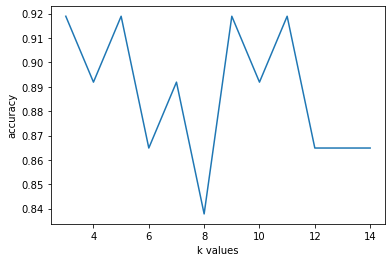

In [23]:
plt.plot(neighbors,acc_val)
plt.xlabel('k values')
plt.ylabel("accuracy")

In [24]:
## k=9
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [25]:
y_pred[0:5]

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [26]:
y_test[0:5]

74     Iris-versicolor
145     Iris-virginica
29         Iris-setosa
21         Iris-setosa
46         Iris-setosa
Name: Classification, dtype: object

In [27]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.918918918918919
precision is : 0.9095238095238095
recall is : 0.9153439153439153
F1 score is : 0.9112132182307621


In [28]:
temp.append(['KNN',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


In [29]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rm=RandomForestClassifier()
rm.fit(x_train,y_train)
y_pred=rm.predict(x_test)

In [30]:
y_pred[0:5]

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [31]:
y_test[0:5]

74     Iris-versicolor
145     Iris-virginica
29         Iris-setosa
21         Iris-setosa
46         Iris-setosa
Name: Classification, dtype: object

In [32]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.918918918918919
precision is : 0.9076923076923077
recall is : 0.9153439153439153
F1 score is : 0.9103313840155945


In [33]:
temp.append(['Random Forest',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])

In [34]:
#SVM
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [35]:
y_pred[0:5]

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [36]:
y_test[0:5]

74     Iris-versicolor
145     Iris-virginica
29         Iris-setosa
21         Iris-setosa
46         Iris-setosa
Name: Classification, dtype: object

In [37]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.918918918918919
precision is : 0.9076923076923077
recall is : 0.9153439153439153
F1 score is : 0.9103313840155945


In [38]:
temp.append(['SVM',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])

In [39]:
df1 = pd.DataFrame(temp, columns = ['Algorithms', 'F1-Score','accuracy','precision','recall'])
df1

,Algorithms,F1-Score,accuracy,precision,recall
0,Logistic Regression,0.88395,0.89189,0.88345,0.89153
1,KNN,0.91121,0.91892,0.90952,0.91534
2,Random Forest,0.91033,0.91892,0.90769,0.91534
3,SVM,0.91033,0.91892,0.90769,0.91534
